In [49]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('C:\Learn_AI\Model\Iris_Test_Model\DataSet_Iris\Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [53]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [54]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [55]:
df['Species'].replace({'Iris-setosa' : 0 , 'Iris-versicolor' : 1 , 'Iris-virginica' : 2} , inplace = True)


In [56]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [57]:
df_xuly = df.copy(deep = True)
y = df['Species']
df_xuly = df_xuly.drop(['Id' , 'Species'] , axis = 1)

In [58]:
X = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

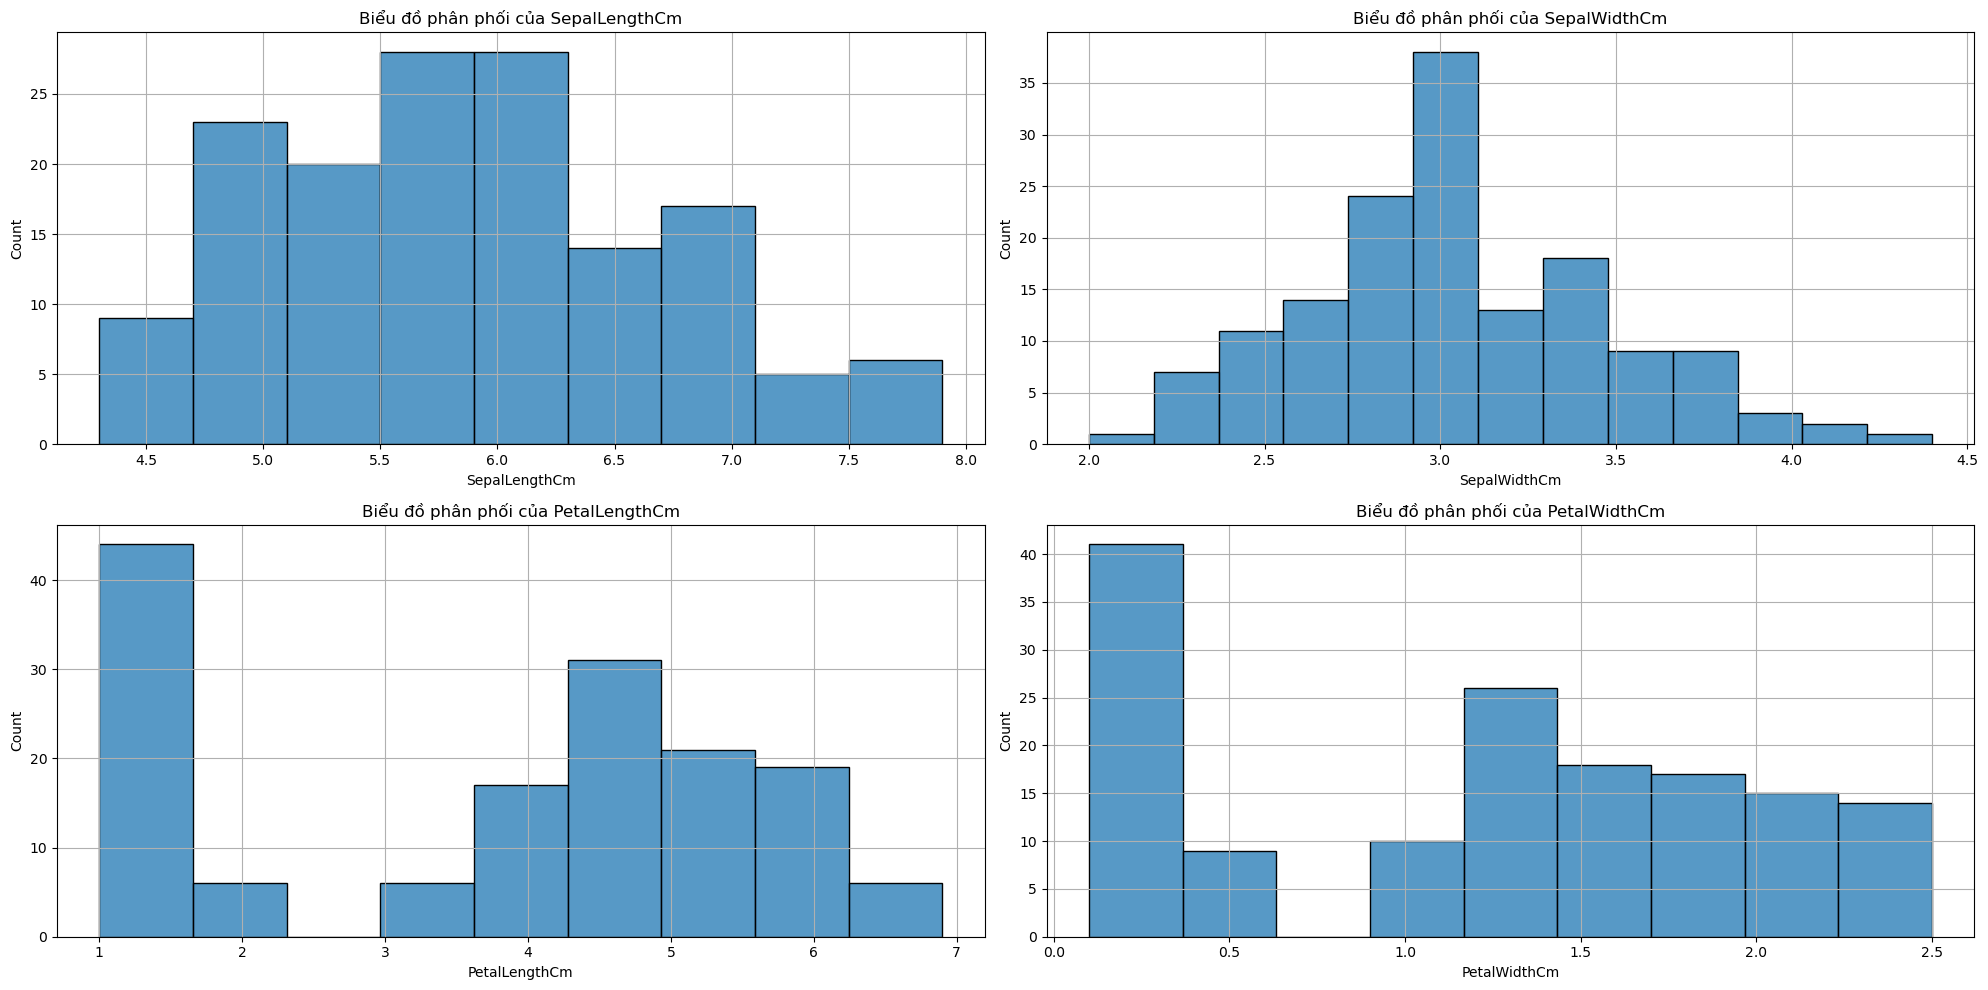

In [59]:
cols = 2 
rows = len(X) // 2 
fig , axe = plt.subplots(rows , cols , figsize= (20,10))
for y in range(rows):
    for x in range(cols):
        axes = axe[y , x]
        X_ = df_xuly.iloc[: , y* cols + x]
        sns.histplot(X_ , ax = axes)
        title = X[y*cols + x]
        axes.set_title(f"Biểu đồ phân phối của {title}")
        axes.grid()
plt.tight_layout()
plt.show()

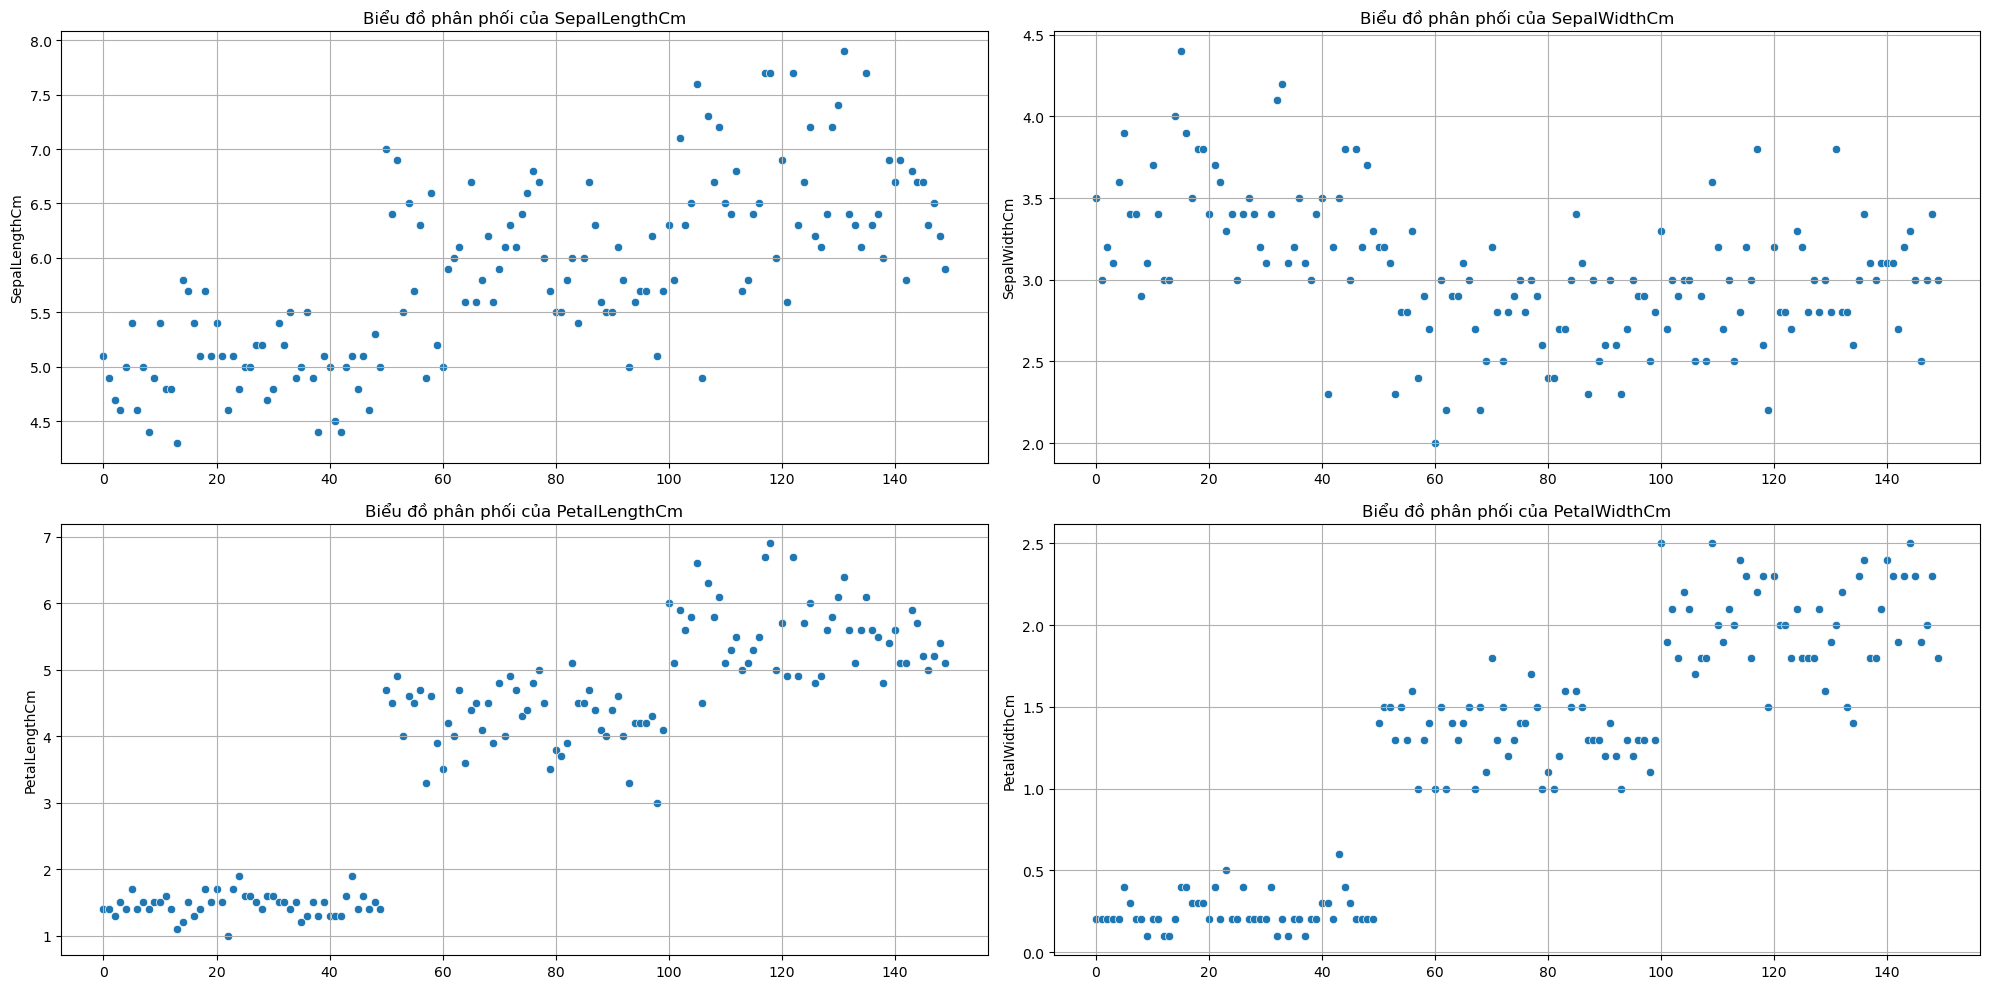

In [60]:
cols = 2 
rows = len(X) // 2 
fig , axe = plt.subplots(rows , cols , figsize= (20,10))
for y in range(rows):
    for x in range(cols):
        axes = axe[y , x]
        X_ = df_xuly.iloc[: , y* cols + x]
        sns.scatterplot(X_ , ax = axes)
        title = X[y*cols + x]
        axes.set_title(f"Biểu đồ phân phối của {title}")
        axes.grid()
plt.tight_layout()
plt.show()

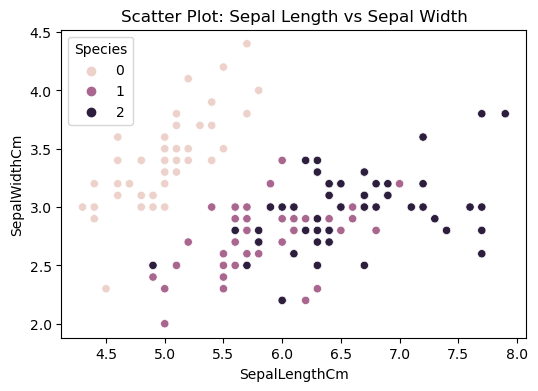

In [61]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue=df['Species'])
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.show()

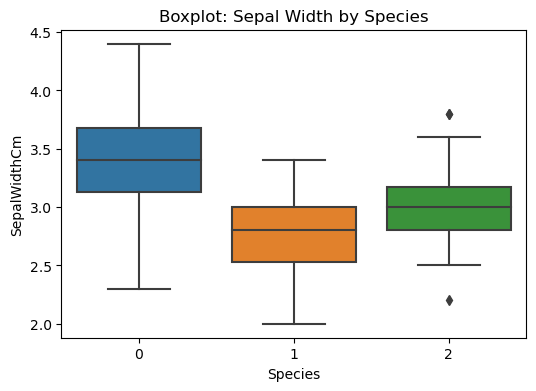

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Species', y=df['SepalWidthCm'])
plt.title('Boxplot: Sepal Width by Species')
plt.show()

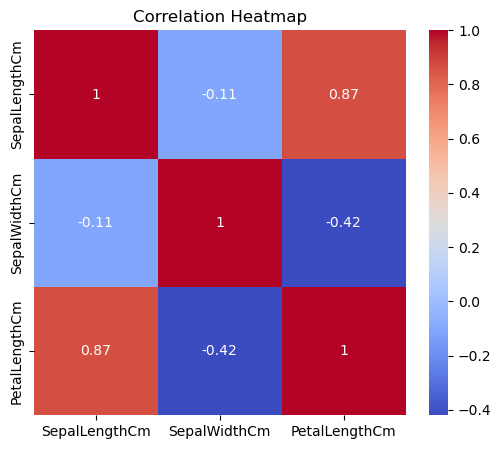

In [63]:
plt.figure(figsize=(6,5))
corr = df_xuly.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [69]:
# Giảm đa cộng tuyến 
df_xuly.drop('SepalLengthCm' , axis = 1 , inplace = True)

# Train_Model

- Bagging(Random Forest)

In [70]:
X = df_xuly
y = df['Species']

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test , y_pred))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# AdaBoost

- AdaBoost gán trọng số cho các mẫu dữ liệu, tập trung vào các mẫu bị phân loại sai trong các vòng lặp.

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
base_estimator = DecisionTreeClassifier(max_depth=1)  # Cây quyết định đơn giản
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test , y_pred))

AdaBoost Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


# XGBoost
- XGBoost là một triển khai boosting mạnh mẽ, tối ưu hóa hàm mất mát bằng gradient descent.

In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test , y_pred))

AdaBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Stacking
- Stacking kết hợp nhiều mô hình cơ sở (base learners) và sử dụng một mô hình meta-learner để tổng hợp dự đoán.

In [78]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]
stacking = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test , y_pred))

AdaBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Voting Classifier
- Voting Classifier kết hợp dự đoán từ nhiều mô hình thông qua bỏ phiếu (hard hoặc soft).

In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]
voting = VotingClassifier(estimators=estimators, voting='soft')  # soft voting dựa trên xác suất
voting.fit(X_train, y_train)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test , y_pred))

AdaBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Tổng kết

# Khi Nào Nên Sử Dụng Các Kỹ Thuật Ensemble và Cách Chọn

## 1. Bagging (Random Forest)
### Khi nào nên sử dụng?
- Dữ liệu nhiễu cao hoặc mô hình cơ sở dễ overfitting.
- Cần huấn luyện song song, tiết kiệm thời gian.
- Bài toán phân loại/hồi quy đơn giản.

### Khi nào không nên sử dụng?
- Dữ liệu nhỏ hoặc mô hình cơ sở có bias cao.
- Cần mô hình dễ diễn giải.

### Làm sao để chọn?
- Kiểm tra phương sai cao (kết quả thay đổi lớn khi đổi tập train/test).
- Thử Random Forest trước vì dễ triển khai, hiệu quả.

## 2. Boosting (AdaBoost, XGBoost)
### Khi nào nên sử dụng?
- Dữ liệu có bias cao, mô hình cơ sở yếu.
- Bài toán cần độ chính xác cao (như thi đấu Kaggle).
- Dữ liệu phức tạp, nhiều đặc trưng.

### Khi nào không nên sử dụng?
- Dữ liệu rất nhiễu (dễ370 overfitting).
- Tài nguyên tính toán hạn chế.
- Cần mô hình dễ diễn giải.

### Làm sao để chọn?
- So sánh với mô hình cơ sở; nếu kém, boosting có thể cải thiện.
- Dùng cross-validation để đánh giá XGBoost/AdaBoost.
- Phù hợp với dữ liệu lớn, phức tạp.

## 3. Stacking
### Khi nào nên sử dụng?
- Có nhiều mô hình đa dạng, mạnh, bổ sung lẫn nhau.
- Bài toán yêu cầu độ chính xác tối đa (như thi đấu).
- Có tài nguyên tính toán và dữ liệu lớn.

### Khi nào không nên sử dụng?
- Dữ liệu nhỏ (dễ overfitting).
- Thời gian hoặc tài nguyên hạn chế.
- Bài toán đơn giản, mô hình đơn lẻ đủ tốt.

### Làm sao để chọn?
- Thử nghiệm các mô hình riêng; nếu hiệu suất tương đương nhưng khác nhau, stacking có thể cải thiện.
- So sánh với Random Forest/XGBoost qua tập validation.
- Dùng cho bài toán thi đấu cần tối ưu hóa.

## 4. Voting Classifier
### Khi nào nên sử dụng?
- Các mô hình có hiệu suất tương đương, bổ sung lẫn nhau.
- Cần phương pháp đơn giản, nhanh chóng.
- Bài toán phân loại.

### Khi nào không nên sử dụng?
- Một mô hình đơn lẻ vượt trội rõ rệt.
- Dữ liệu nhỏ, không tận dụng được sự đa dạng.
- Cần tối ưu hóa phức tạp.

### Làm sao để chọn?
- So sánh hiệu suất các mô hình riêng; nếu tương đương, thử voting.
- Dùng soft voting nếu các mô hình cho xác suất đáng tin cậy.
- Ưu tiên khi cần giải pháp đơn giản.

## Cách Chọn Phương Pháp Phù Hợp
1. **Hiểu dữ liệu**: Kích thước, mức độ nhiễu, loại bài toán.
2. **Thử mô hình đơn giản**: Bắt đầu với Random Forest, sau đó thử XGBoost nếu cần độ chính xác cao.
3. **So sánh mô hình**: Dùng cross-validation để đánh giá Random Forest, XGBoost, Voting, Stacking.
4. **Kiểm tra tài nguyên**: Thời gian và tính toán hạn chế thì chọn Random Forest/Voting; nếu đủ tài nguyên, thử Stacking.
5. **Dùng tập validation**: Chọn phương pháp tốt nhất trên tập validation, tránh overfitting.
6. **Tinh chỉnh siêu tham số**: Đặc biệt với Boosting và Stacking để tối ưu hiệu suất.